# IN THE PREVIOUS NOTEBOOK WE MADE A ML MODEL i.e RANDOM FOREST REGRESSOR WITH AN R^2 OF 70% THAT WAS GOOD. BUT RANDOM FOREST 
# IS USED TO CAPTURE NON LINEARITY AND HIDDEN PATTERN'S IN THE DATASET NOW WE WILL TRY TO SEE AND APPLY SOME REGRESSION TECHNIQUE.
# WE BELIVE THAT THE BEST APPROACH TO MAKE THIS NOTEBOOK AND PERFORM ANALYSIS IS GOING BY APPROACH OF ASSUMPTIONS

# NORMALITY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('C:/Users/aditya/Desktop/Eco project/Datasets/data1.csv')

In [3]:
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
data_1=data[['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption']]

In [5]:
data_1.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [6]:
data_1.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
count,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000
mean,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125
std,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000
25%,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000
50%,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000
75%,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000


# DATA PREPROCESSING

In [7]:
data_1.isnull().sum()

Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
dtype: int64

In [8]:
data_1.shape

(1949, 7)

In [9]:
percentage_of_null=(110 / 1949)*100

In [10]:
print(f'The percetage of null values in the dataset is: {percentage_of_null}')

The percetage of null values in the dataset is: 5.643919958953309


# SINCE THE PERCENTAGE OF NULL VALUES IS CLOSE TO 5% WE WILL DROP IT

In [11]:
data_1.dropna(inplace=True)

C:\Users\aditya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
data_1.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
count,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000
mean,5.445009,9.319925,0.810152,63.217917,0.739480,-0.000717,0.751114
std,1.136014,1.158067,0.121692,7.680511,0.142728,0.162050,0.185855
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000
25%,4.595000,8.393750,0.741000,58.175000,0.644000,-0.111250,0.697000
50%,5.359000,9.456000,0.834500,65.100000,0.757500,-0.025500,0.806000
75%,6.252000,10.268500,0.908000,68.680000,0.852000,0.089000,0.875000
max,7.971000,11.648000,0.987000,77.100000,0.985000,0.689000,0.983000


# LET'S TRY TO SEE THE DISTIBUTION OF THE EACH VARIABLES

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Life Ladder', ylabel='Density'>

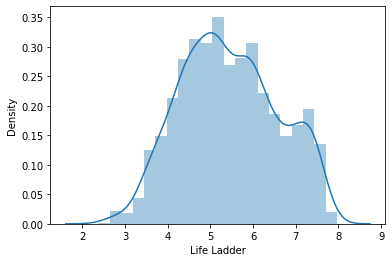

In [13]:
sns.distplot(data_1['Life Ladder'])

# SO LIFE LADDER FOLLOWS A NORMAL DISTRIBUTION

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log GDP per capita', ylabel='Density'>

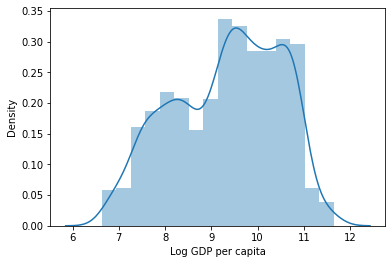

In [14]:
sns.distplot(data_1['Log GDP per capita'])

# THIS IS NOT FULLY NORMALLY DISTIBUTION BUT IT IS ALREADY A LOG TRANSFROMED VARAIBLE SO MORE TRANSOFORMATIONS WILL NOT DO ANY GOOD

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Social support', ylabel='Density'>

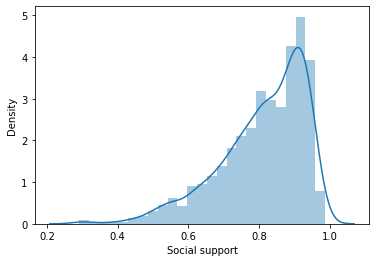

In [15]:
sns.distplot(data_1['Social support'])

# SO CLEARLY IS FOLLOWING A SKEWED DISTIBUTION SO LET'S TRY TO NORMALISE IT

# LET'S TRY TO DO LOG 1+X TRANSFORMATIONS IN THIS CASE

In [16]:
data_2=data_1.copy()
data_2.columns

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption'],
      dtype='object')

In [17]:
data_2['Social support']=np.log(1+data_2['Social support'])

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Social support', ylabel='Density'>

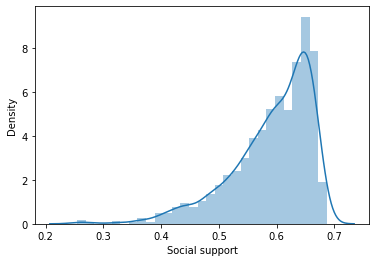

In [18]:
sns.distplot(data_2['Social support'])

# NO SUCESS IN THIS CASE

In [19]:
data_2['Social support']=data_1['Social support']

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Social support', ylabel='Density'>

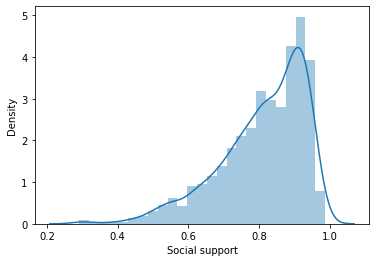

In [20]:
sns.distplot(data_2['Social support'])

In [21]:
data_2['Social support']=np.log(data_2['Social support'])

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Social support', ylabel='Density'>

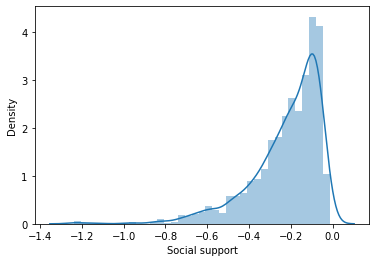

In [22]:
sns.distplot(data_2['Social support'])

# SO LOG AND LOG (1+X) TRANSFORMATIONS ARE NOR HELPING US`

In [23]:
data_2['Social support']=data_1['Social support']

In [24]:
data_2['Social support']=np.sqrt(data_2['Social support'])

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Social support', ylabel='Density'>

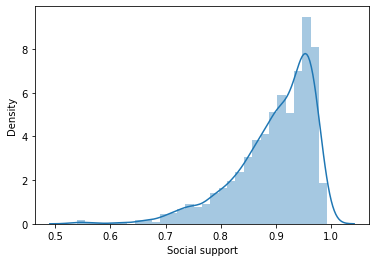

In [25]:
sns.distplot(data_2['Social support'])

# SO LATELY Box - Cox Transformations is very widely used on the industry let's try to use it

# MOREOVER RATHER THAN TARGETING EACH VARAIABLE ONE BY ONE LET'S TARGET THE ENTIRE DATASET USING BOX COX TRANSFORMATION

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


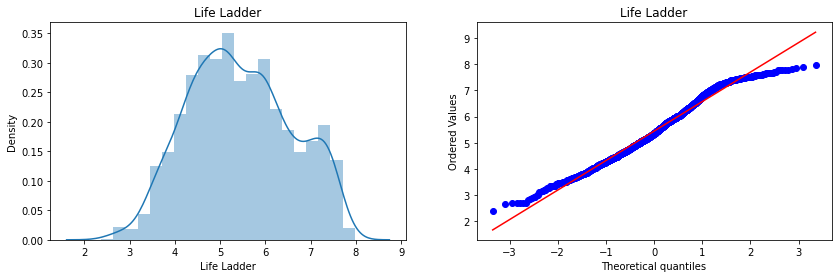

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


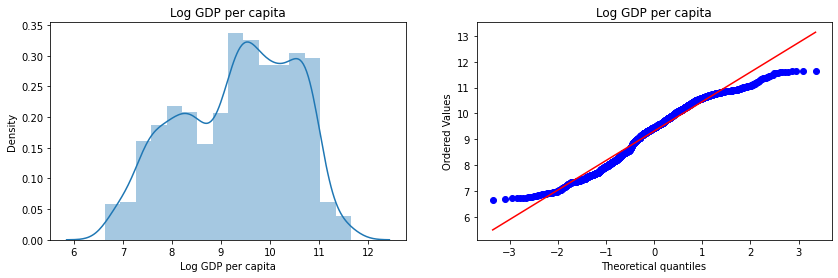

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


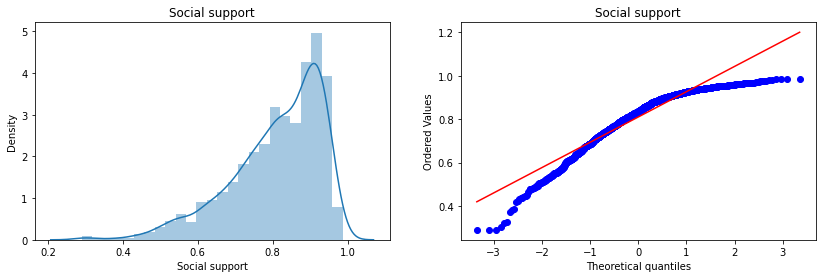

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


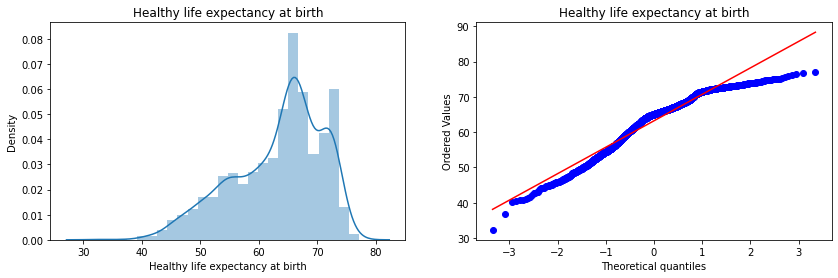

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


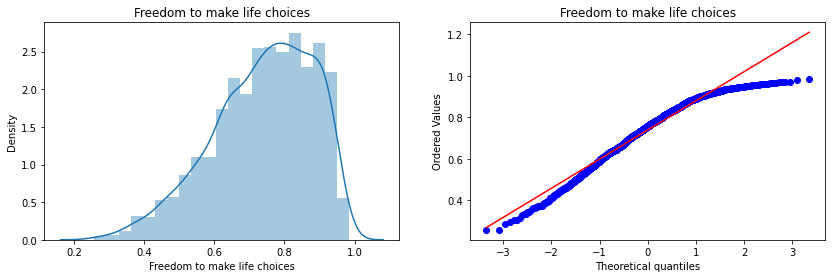

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


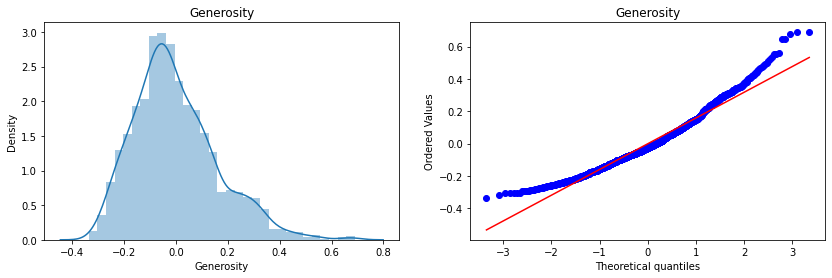

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


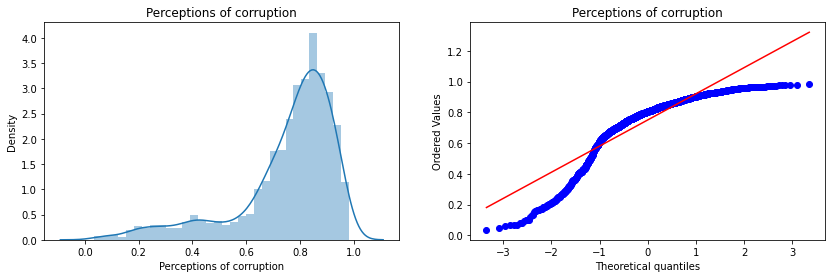

In [26]:
import scipy.stats as stats

# Plotting the distplots without any transformation

for col in data_1.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(data_1[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(data_1[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

# SO FROM HERE WE FIND THAT THERE IS SKEWNESS IS THE DATASET IN VARIABLES SUCH AS SOCIAL SUPPORT AND PERCEPTION'S OF CORRUPTION 

# ONLY ASSUMPTION IN APPLYING BOX COX TRANSFORMATION IS THAT DATA SHOUD BE POSITIVE

# BUT GENEROSITY HAS NEGATIVE VALUES IN IT  SO WE CAN'T APPLY BOX COX TRASFORMATIONS AS WELL MOREOVER THE DATA POINT SHOULD NOT BE ZERO

# Yeo - Johnson Transform IS ALSO NEW FEATURE ADDED IN PYTHON SO IT OVERCOMES ALL THE DIFFICULTY SO BOX COX TRANSFORMATIONS I.E ZERO VALUE AND NON NEGATVE DATA

In [27]:

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

X = pt.fit_transform(data_2)


In [28]:
Xtransformed = pd.DataFrame(X,columns=data_1.columns)

In [29]:
Xtransformed.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,-1.562535,-1.588810,-2.047935,-1.507582,-0.283094,1.084932,0.813473
1,-0.912049,-1.471343,-1.771675,-1.474599,-0.549433,1.189136,0.492075
2,-0.582603,-1.395949,-1.814924,-1.440980,-1.033563,0.849337,-0.605423
3,-1.456723,-1.415080,-1.870759,-1.413622,-1.567983,1.055864,-0.455016
4,-1.504621,-1.354609,-1.870759,-1.385848,-1.400358,1.395624,-0.138721


C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


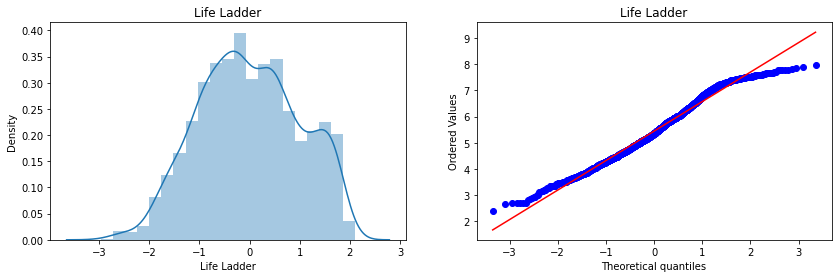

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


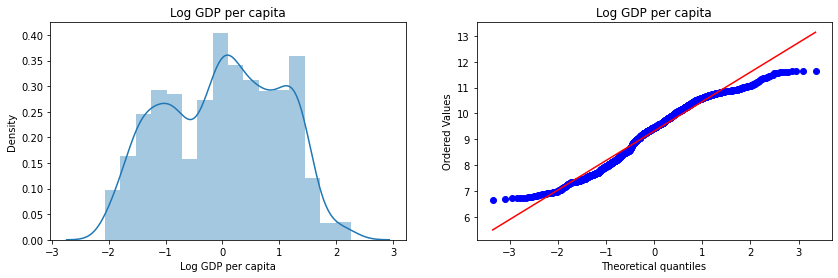

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


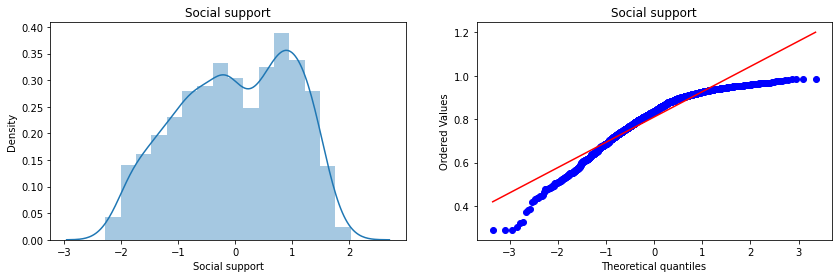

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


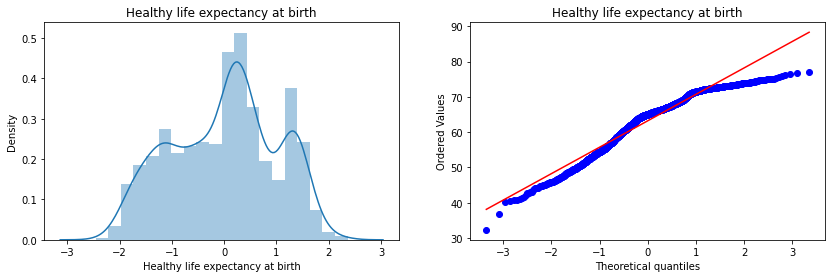

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


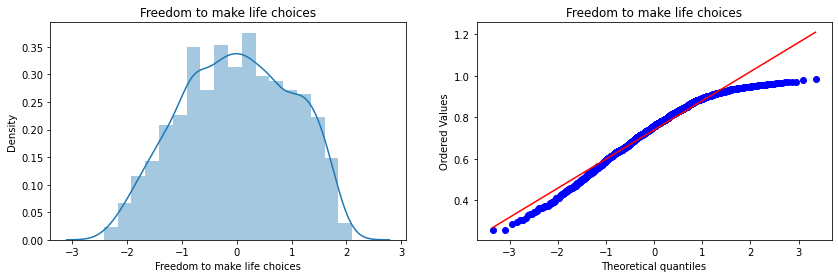

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


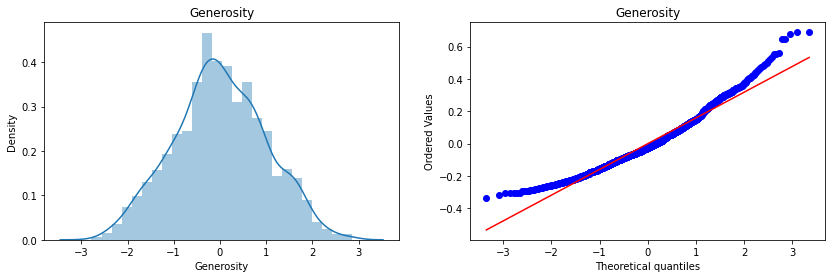

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


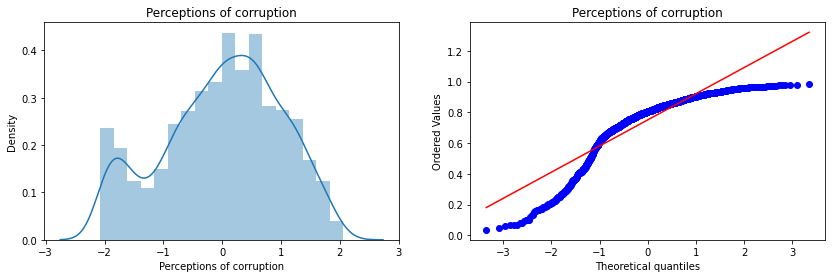

In [30]:
for col in Xtransformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(Xtransformed[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(data_1[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

# SO NOW YOU CAN SEE THAT  Yeo - Johnson Transform  All the varaibles follow an almost normal distribution .

# SO WE HAVE SEEN THE NORMALITY MOST PEOPLE IGNORE THIS BUT THAT NOT ''''''''''NORMAL''''''''''

# MULTICOLLINEARITY

In [31]:
Xtransformed.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,-1.562535,-1.588810,-2.047935,-1.507582,-0.283094,1.084932,0.813473
1,-0.912049,-1.471343,-1.771675,-1.474599,-0.549433,1.189136,0.492075
2,-0.582603,-1.395949,-1.814924,-1.440980,-1.033563,0.849337,-0.605423
3,-1.456723,-1.415080,-1.870759,-1.413622,-1.567983,1.055864,-0.455016
4,-1.504621,-1.354609,-1.870759,-1.385848,-1.400358,1.395624,-0.138721


# Lets see correlation matrix first 

In [32]:
Xtransformed.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Life Ladder,1.000000,0.799506,0.758579,0.784147,0.537874,0.163298,-0.382667
Log GDP per capita,0.799506,1.000000,0.741924,0.878723,0.384009,-0.041363,-0.283250
Social support,0.758579,0.741924,1.000000,0.665498,0.461045,0.073648,-0.235450
Healthy life expectancy at birth,0.784147,0.878723,0.665498,1.000000,0.421608,0.021904,-0.307187
Freedom to make life choices,0.537874,0.384009,0.461045,0.421608,1.000000,0.355822,-0.515653
Generosity,0.163298,-0.041363,0.073648,0.021904,0.355822,1.000000,-0.275093
Perceptions of corruption,-0.382667,-0.283250,-0.235450,-0.307187,-0.515653,-0.275093,1.000000


# DETECTION OF MUTLICOLLINEARITY 
 # 1.CORRLELATION MATRIX 

# SEEING THE CORRELATION MATRIX WE CAN SEE THAT OUR DATA IS HIGHLY CORRELELATED

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.tools as tls
import plotly.figure_factory as ff
sns.set(style="whitegrid")

In [34]:
data=Xtransformed
fig = ff.create_annotated_heatmap(data.corr().values.tolist(),
                                   
                                  y=data.columns.tolist(),
                                  x=data.columns.tolist(), 
                                  colorscale='Inferno',
                                  showscale=True)
fig.update_layout(
    autosize=False,
    width=2000,
    height=2000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

# MULITCOLLINEARITY

In [35]:
import pandas as pd
import numpy as np

In [36]:
Xtransformed.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,-1.562535,-1.588810,-2.047935,-1.507582,-0.283094,1.084932,0.813473
1,-0.912049,-1.471343,-1.771675,-1.474599,-0.549433,1.189136,0.492075
2,-0.582603,-1.395949,-1.814924,-1.440980,-1.033563,0.849337,-0.605423
3,-1.456723,-1.415080,-1.870759,-1.413622,-1.567983,1.055864,-0.455016
4,-1.504621,-1.354609,-1.870759,-1.385848,-1.400358,1.395624,-0.138721


# FOR DETECTION OF MULTICOLLINEARITY WE WILL CONSIDER   Variance inflation factors (VIF) (SEEING THE CORRELATION MATRIX WE ALREADY KNOW THAT THE DATA SUFFER'S FROM MULTICOLLINEARITY)

In [37]:
X=Xtransformed

In [38]:
X.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,-1.562535,-1.588810,-2.047935,-1.507582,-0.283094,1.084932,0.813473
1,-0.912049,-1.471343,-1.771675,-1.474599,-0.549433,1.189136,0.492075
2,-0.582603,-1.395949,-1.814924,-1.440980,-1.033563,0.849337,-0.605423
3,-1.456723,-1.415080,-1.870759,-1.413622,-1.567983,1.055864,-0.455016
4,-1.504621,-1.354609,-1.870759,-1.385848,-1.400358,1.395624,-0.138721


In [39]:
x=X.drop('Life Ladder',axis=1)

In [40]:
y=X['Life Ladder']

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = x
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                            feature       VIF
0                Log GDP per capita  5.682262
1                    Social support  2.458608
2  Healthy life expectancy at birth  4.574034
3      Freedom to make life choices  1.807047
4                        Generosity  1.227249
5         Perceptions of corruption  1.426828


# SO YOU CAN SEE THAT THERE ARE SOME VARAIBLES WHERE VIF IS CLOSE OR GREATER THAN 5 BUT REMEMBER THESE ARE TRANSFORMED VARIABLES 
# LETS COMPUTE THE SAME FOR NON TRANSFROMED VARAIBLES

In [42]:
data=pd.read_csv('C:/Users/aditya/Desktop/Eco project/Datasets/data1.csv')

In [43]:
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [44]:
data.dropna(inplace=True)

In [45]:
data_x=data.drop(['Life Ladder','Country name','year','Positive affect','Negative affect'],axis=1)
y=pd.DataFrame(['Life Ladder'])

In [46]:
data_x.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.370,0.451,50.80,0.718,0.168,0.882
1,7.540,0.552,51.20,0.679,0.190,0.850
2,7.647,0.539,51.60,0.600,0.121,0.707
3,7.620,0.521,51.92,0.496,0.162,0.731
4,7.705,0.521,52.24,0.531,0.236,0.776


In [47]:
data_x.dropna(inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = data_x
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                            feature         VIF
0                Log GDP per capita  311.831358
1                    Social support   98.373154
2  Healthy life expectancy at birth  263.819700
3      Freedom to make life choices   37.743745
4                        Generosity    1.188771
5         Perceptions of corruption   12.199964


# SO NOW YOU CAN SEE THE DIFFERENCE B/W ACTUAL VARAIBLES AND TRANSFROMED VARAIBLES NOW IN STATISTICAL SENSE ONE MIGHT CONSIDER THE TRANSFORMED VARIBLES BUT DOES THE TRANFORMED VARIBLES MAKE SENSE IS KEY QUESTION WHICH IS FACED BY DATA SCIENTISTS ON A REGULAR BASIS THEY CONSULT THE PRODUCT OWNER AND TRY TO DISCUSS

In [48]:
data_x.corr()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Log GDP per capita,1.000000,0.705972,0.860345,0.353182,-0.024565,-0.343468
Social support,0.705972,1.000000,0.617446,0.411719,0.056131,-0.226855
Healthy life expectancy at birth,0.860345,0.617446,1.000000,0.384829,0.018188,-0.334990
Freedom to make life choices,0.353182,0.411719,0.384829,1.000000,0.326313,-0.488072
Generosity,-0.024565,0.056131,0.018188,0.326313,1.000000,-0.288467
Perceptions of corruption,-0.343468,-0.226855,-0.334990,-0.488072,-0.288467,1.000000


In [49]:
x.corr()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Log GDP per capita,1.000000,0.741924,0.878723,0.384009,-0.041363,-0.283250
Social support,0.741924,1.000000,0.665498,0.461045,0.073648,-0.235450
Healthy life expectancy at birth,0.878723,0.665498,1.000000,0.421608,0.021904,-0.307187
Freedom to make life choices,0.384009,0.461045,0.421608,1.000000,0.355822,-0.515653
Generosity,-0.041363,0.073648,0.021904,0.355822,1.000000,-0.275093
Perceptions of corruption,-0.283250,-0.235450,-0.307187,-0.515653,-0.275093,1.000000


# SOLUTION OR REMEDY FOR MULTICOLLINEARITY WHICH WAS USED IN MODEL BUILDING WAS DROPING THE VARAIBLES I FELT THAT KEEPING A ECONOMIC AND A NON ECONOMIC VARIBLE WOULD DO BE BETTER 
# TO NOT OVER COMPLICATE THINGS

# BUT SENSE THIS IS A STATISTICAL NOTEBOOK SO TRYING OUT DIFFERENT THINGS IS THE KEY SO LET'S USE PCA THEN AS A REMEDY

# TRYING OUT PCA ON THE MAIN DATASET(NON TRANSFORMED)


In [50]:
data=pd.read_csv('C:/Users/aditya/Desktop/Eco project/Datasets/data1.csv')

In [51]:
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [52]:
data.dropna(inplace=True)

In [53]:
data.drop(['Country name','year','Positive affect','Negative affect'],axis=1,inplace=True)

In [54]:
data.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
data_1 = sc.fit_transform(data)


In [56]:
data_1=pd.DataFrame(data_1)

In [57]:
data_1.head()

,0,1,2,3,4,5,6
0,-1.516098,-1.685406,-2.954896,-1.616897,-0.150150,1.040613,0.704422
1,-0.919403,-1.538602,-2.124318,-1.564846,-0.423250,1.176369,0.532354
2,-0.606095,-1.446202,-2.231224,-1.512795,-0.976454,0.750590,-0.236574
3,-1.421050,-1.469517,-2.379248,-1.471154,-1.704723,1.003589,-0.107524
4,-1.464174,-1.396115,-2.379248,-1.429513,-1.459633,1.460221,0.134447


In [58]:
data_1.columns=data.columns

In [59]:
data_1.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,-1.516098,-1.685406,-2.954896,-1.616897,-0.150150,1.040613,0.704422
1,-0.919403,-1.538602,-2.124318,-1.564846,-0.423250,1.176369,0.532354
2,-0.606095,-1.446202,-2.231224,-1.512795,-0.976454,0.750590,-0.236574
3,-1.421050,-1.469517,-2.379248,-1.471154,-1.704723,1.003589,-0.107524
4,-1.464174,-1.396115,-2.379248,-1.429513,-1.459633,1.460221,0.134447


In [60]:
X=data_1.drop('Life Ladder',axis=1)
y=data_1['Life Ladder']

In [61]:
from sklearn.decomposition import PCA
y=pd.DataFrame(y) 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X)
X_test = pca.transform(y)


In [62]:
X_train

array([[ 3.19013548,  1.91359087],
       [ 2.73789436,  1.73601   ],
       [ 2.72097267,  1.53812434],
       ...,
       [ 1.34457369,  0.21523607],
       [ 1.7386921 , -0.06015635],
       [ 1.76288078,  0.38372707]])

In [63]:
X_test

array([[2.48701194, 0.18932982],
       [1.50819186, 0.11481477],
       [0.99423913, 0.07568887],
       ...,
       [2.64293018, 0.20119948],
       [3.97400999, 0.30253116],
       [3.30125165, 0.2513158 ]])

In [64]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

C:\Users\aditya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.



In [65]:
from sklearn.linear_model import LinearRegression
 
classifier = LinearRegression()
classifier.fit(X_train, X_test)

LinearRegression()

In [66]:
classifier.score(X_train,X_test)

0.7449868591076672

# SO YOU CAN SEE ON THE TRAINING DATA WE HAVE A ACCURACY OF 74 % WHICH IS LESS SINCE THIS IS THE ACCURACY ON THE TRAINING DATA IN WHICH WE HAVE 2 PRINCIPAL COMPONENTS

In [67]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, X_test) 

RandomForestRegressor(random_state=0)

In [68]:
regressor.score(X_train,X_test)

0.9633995895478313

# WE GET AN ACCURACY OF 96 % WILL DISCUSS THE PROBLEMS IN USING PCA IN ECONOMIC AND BUSSINESS SENSE

# SO WILL END MULTICOLLINEARITY HERE AND START WILL HETROSCADICTY 

# HETROSCADCITY BASED ANALYSIS

In [69]:
data.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,3.72,7.37,0.45,50.80,0.72,0.17,0.88
1,4.40,7.54,0.55,51.20,0.68,0.19,0.85
2,4.76,7.65,0.54,51.60,0.60,0.12,0.71
3,3.83,7.62,0.52,51.92,0.50,0.16,0.73
4,3.78,7.71,0.52,52.24,0.53,0.24,0.78


In [70]:
Xtransformed.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,-1.56,-1.59,-2.05,-1.51,-0.28,1.08,0.81
1,-0.91,-1.47,-1.77,-1.47,-0.55,1.19,0.49
2,-0.58,-1.40,-1.81,-1.44,-1.03,0.85,-0.61
3,-1.46,-1.42,-1.87,-1.41,-1.57,1.06,-0.46
4,-1.50,-1.35,-1.87,-1.39,-1.40,1.40,-0.14


In [71]:
y_train=pd.DataFrame(data['Life Ladder'])
y_train_1=pd.DataFrame(Xtransformed['Life Ladder'])

 # WHAT IS HOMOSCADICITY
 # the diagonal elements of the covariance matrix of e are the same indicating that the      variance of each ei  is same and off-diagonal elements of the covariance matrix of e are zero indicating that all disturbances are pairwise uncorrelated. This property of constancy of variance is termed as homoskedasticity

In [72]:
data.to_csv('C:/Users/aditya/Desktop/Eco project/Datasets/fulldataset.csv')
Xtransformed.to_csv('C:/Users/aditya/Desktop/Eco project/Datasets/transformed_dataset.csv')


# FOR HETROSCADCITY WE WILL USE R SINCE  PYTHON LACKS HETROSCADCITY DATA PACKAGE